In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import os.path
from pathlib import Path
import glob

In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers  


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [11]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50, MobileNet, EfficientNetB0, DenseNet121
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, concatenate


In [12]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [13]:
Brain_CT_Path = Path("Documents/DL Mini Project/Brain hemorrhage-normal&hemorrhagic/Data")

In [14]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

In [15]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

In [16]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [18]:
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

In [19]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [20]:
print(Main_Data.head(-1))

                                                    JPG CATEGORY
0     Documents\DL Mini Project\Brain hemorrhage-nor...   11[11]
1     Documents\DL Mini Project\Brain hemorrhage-nor...   11[11]
2     Documents\DL Mini Project\Brain hemorrhage-nor...   11[11]
3     Documents\DL Mini Project\Brain hemorrhage-nor...   11[11]
4     Documents\DL Mini Project\Brain hemorrhage-nor...   11[11]
...                                                 ...      ...
6789  Documents\DL Mini Project\Brain hemorrhage-nor...   N9[N9]
6790  Documents\DL Mini Project\Brain hemorrhage-nor...   N9[N9]
6791  Documents\DL Mini Project\Brain hemorrhage-nor...   N9[N9]
6792  Documents\DL Mini Project\Brain hemorrhage-nor...   N9[N9]
6793  Documents\DL Mini Project\Brain hemorrhage-nor...   N9[N9]

[6794 rows x 2 columns]


In [21]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [22]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

In [23]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
1     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
2     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
3     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
4     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
...                                                 ...         ...
6789  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6790  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6791  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6792  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6793  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal

[6794 rows x 2 columns]


In [24]:
print(Main_Data["CATEGORY"].value_counts())

CATEGORY
Normal        4105
Hemorrhage    2690
Name: count, dtype: int64


In [25]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [26]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
1     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
2     Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
3     Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
4     Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
...                                                 ...         ...
6789  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6790  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6791  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal
6792  Documents\DL Mini Project\Brain hemorrhage-nor...  Hemorrhage
6793  Documents\DL Mini Project\Brain hemorrhage-nor...      Normal

[6794 rows x 2 columns]


In [27]:
plt.style.use('dark_background')

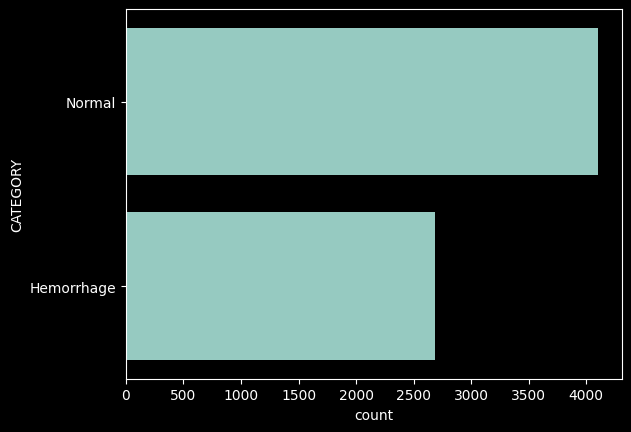

In [28]:
sns.countplot(Main_Data["CATEGORY"])
plt.show()

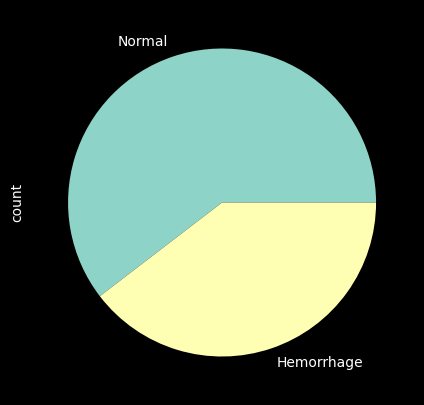

In [29]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

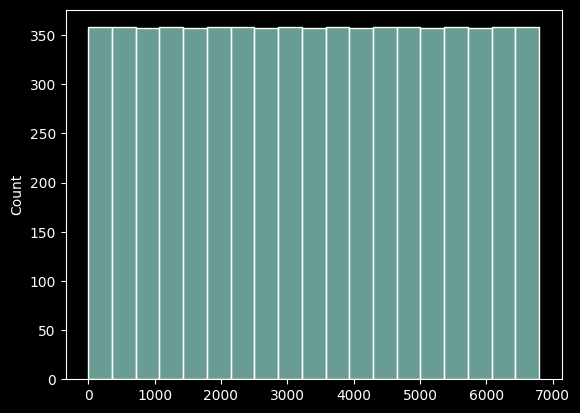

In [30]:
sns.histplot(Main_Data['CATEGORY'].index)
plt.show()

Text(0.5, 1.0, 'Normal')

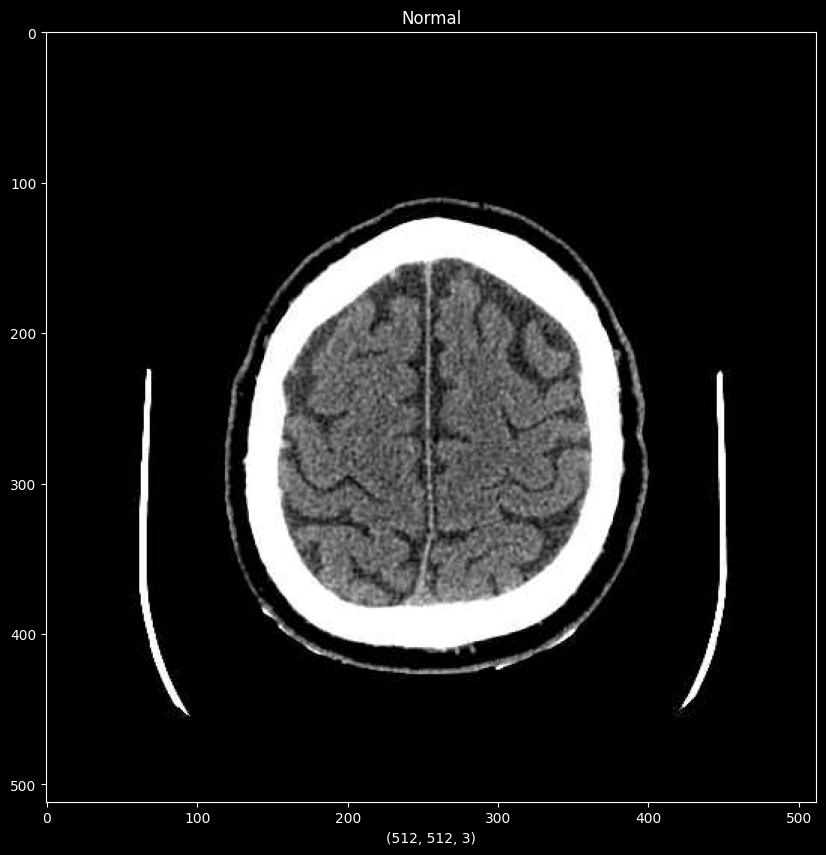

In [31]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Hemorrhage')

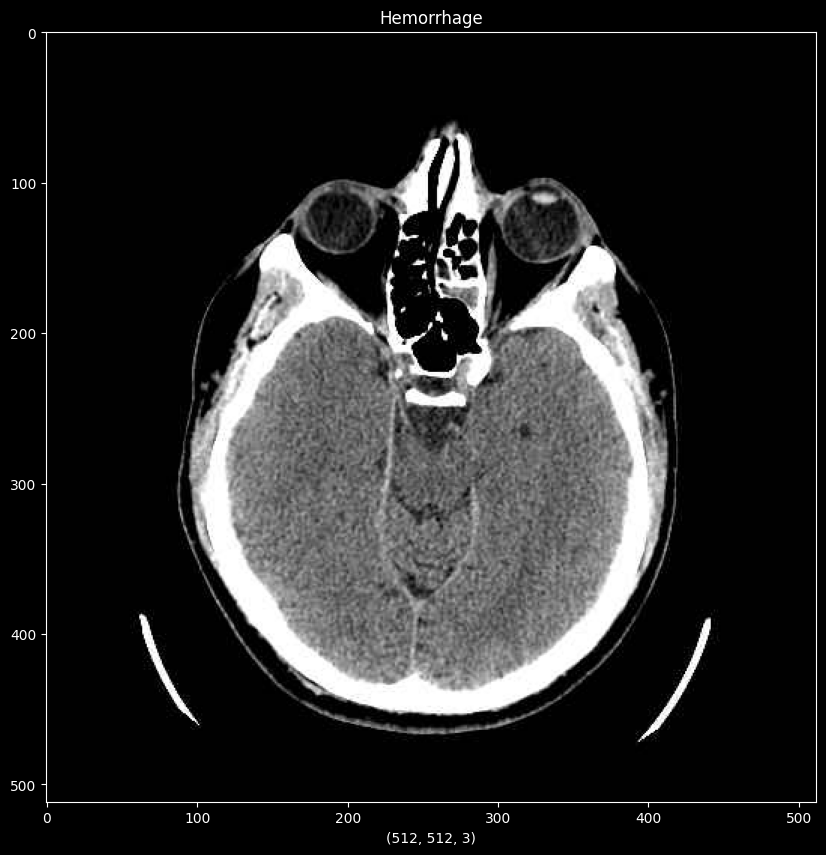

In [32]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][25])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][6769])

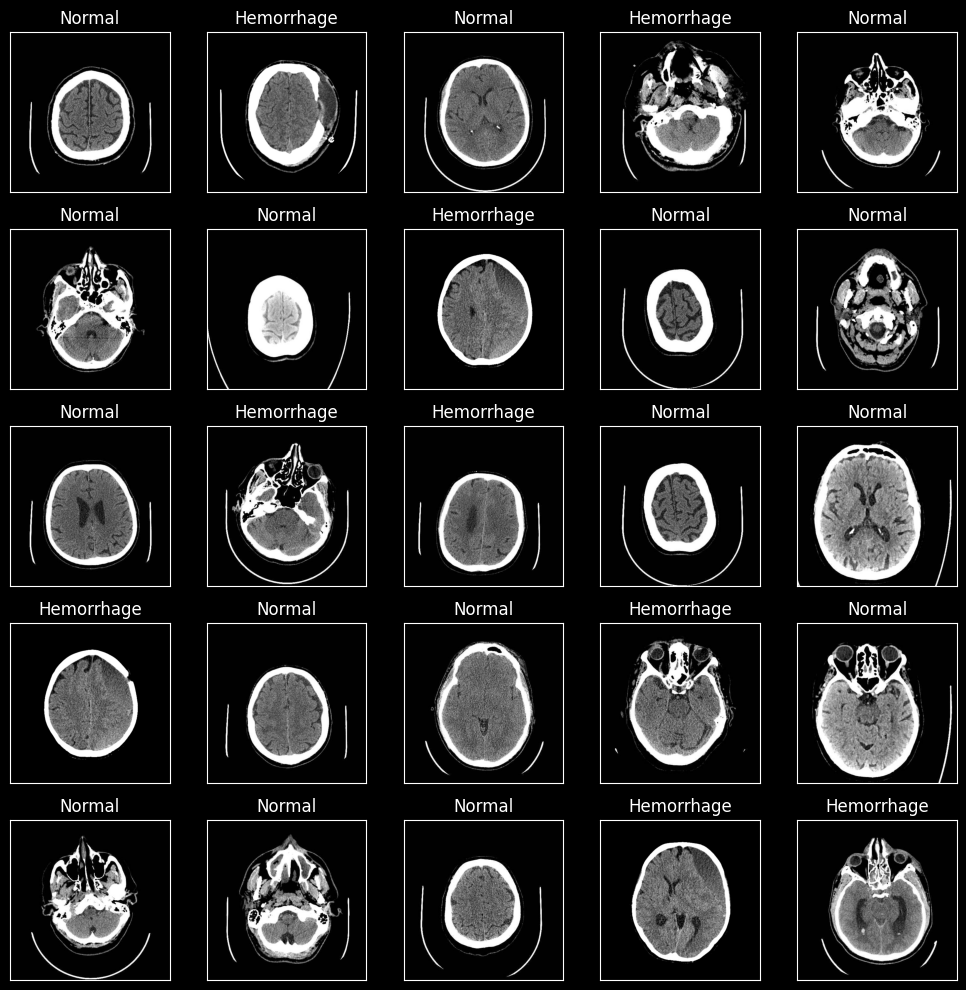

In [33]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Example of normalizing images
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=Main_Data,
    directory=None,
    x_col="JPG",
    y_col="CATEGORY",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224) 
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=Main_Data,
    directory=None,
    x_col="JPG",
    y_col="CATEGORY",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224) 
)


Found 5436 validated image filenames belonging to 2 classes.
Found 1359 validated image filenames belonging to 2 classes.


In [ ]:
#EFFICIENT NET

In [43]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define model parameters
input_shape = (224, 224, 3)
num_classes = 2

# Build EfficientNet model
base_model = tf.keras.applications.EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet")
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
efficientnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

# Compile model
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10
efficientnet_history = efficientnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.8514 - loss: 0.3186 - val_accuracy: 0.3848 - val_loss: 0.8067
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9741 - loss: 0.0765 - val_accuracy: 0.3848 - val_loss: 3.9688
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9883 - loss: 0.0294 - val_accuracy: 0.7822 - val_loss: 0.6647
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9382 - val_loss: 0.1358
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9966 - loss: 0.0080 - val_accuracy: 0.9912 - val_loss: 0.0271
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9891 - loss: 0.0336 - val_accuracy: 0.9890 - val_loss: 0.0429
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9901 - loss: 0.0206 - val_accuracy: 0.9860 - val_loss: 0.0284
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9984 - loss: 0.0057 - val_accu

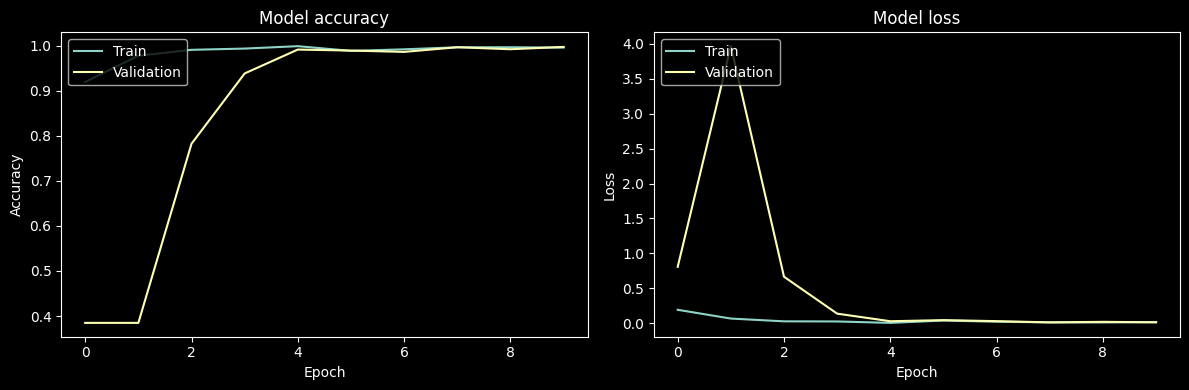

43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step


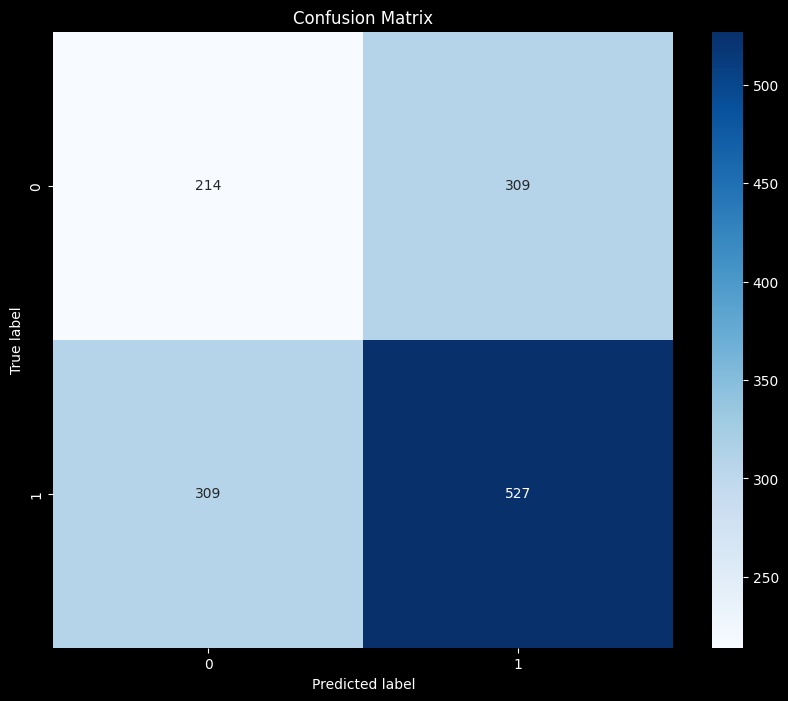

Classification Report
              precision    recall  f1-score   support

  Hemorrhage       0.41      0.41      0.41       523
      Normal       0.63      0.63      0.63       836

    accuracy                           0.55      1359
   macro avg       0.52      0.52      0.52      1359
weighted avg       0.55      0.55      0.55      1359



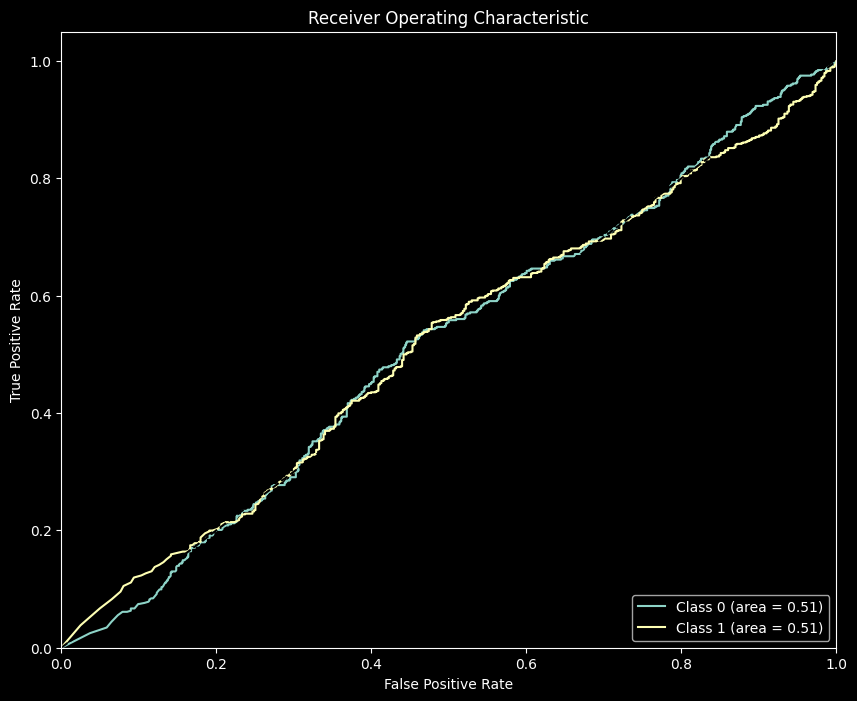

In [45]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['accuracy'])
plt.plot(efficientnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['loss'])
plt.plot(efficientnet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
Y_pred = efficientnet_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [46]:
#RESNET

In [47]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Define model parameters
input_shape = (224, 224, 3)
num_classes = 2

# Build ResNet model
base_model = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
resnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

# Compile model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.7966 - loss: 0.7326 - val_accuracy: 0.6152 - val_loss: 0.6718
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.9561 - loss: 0.1223 - val_accuracy: 0.6159 - val_loss: 0.7302
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - accuracy: 0.9893 - loss: 0.0443 - val_accuracy: 0.3848 - val_loss: 2.2377
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 584s 3s/step - accuracy: 0.9927 - loss: 0.0304 - val_accuracy: 0.7322 - val_loss: 0.4727
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.9901 - loss: 0.0333 - val_accuracy: 0.7528 - val_loss: 1.2574
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 577s 3s/step - accuracy: 0.9934 - loss: 0.0169 - val_accuracy: 0.9397 - val_loss: 0.2670
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 574s 3s/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9985 - val_loss: 0.0024
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 1.0000 - loss: 2.7703e-04 - val_

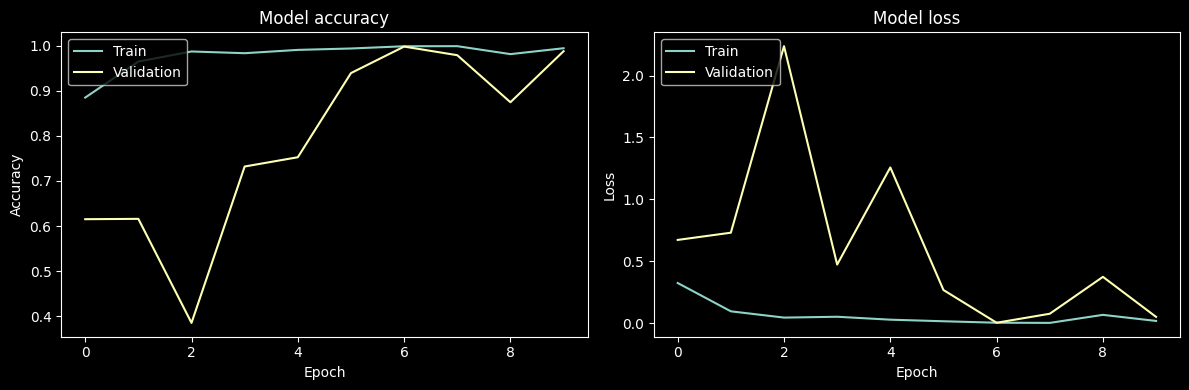

43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 877ms/step


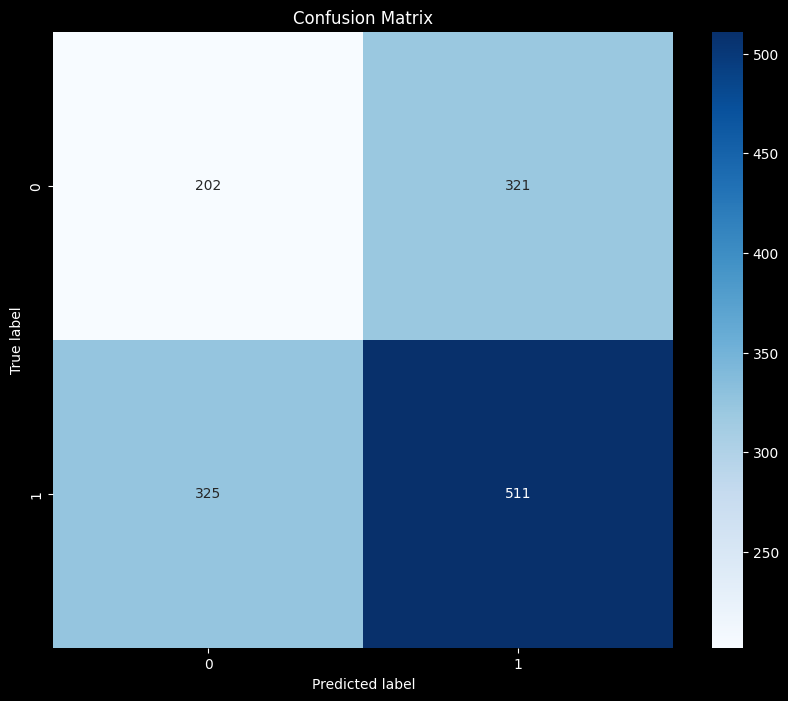

Classification Report
              precision    recall  f1-score   support

  Hemorrhage       0.38      0.39      0.38       523
      Normal       0.61      0.61      0.61       836

    accuracy                           0.52      1359
   macro avg       0.50      0.50      0.50      1359
weighted avg       0.53      0.52      0.52      1359



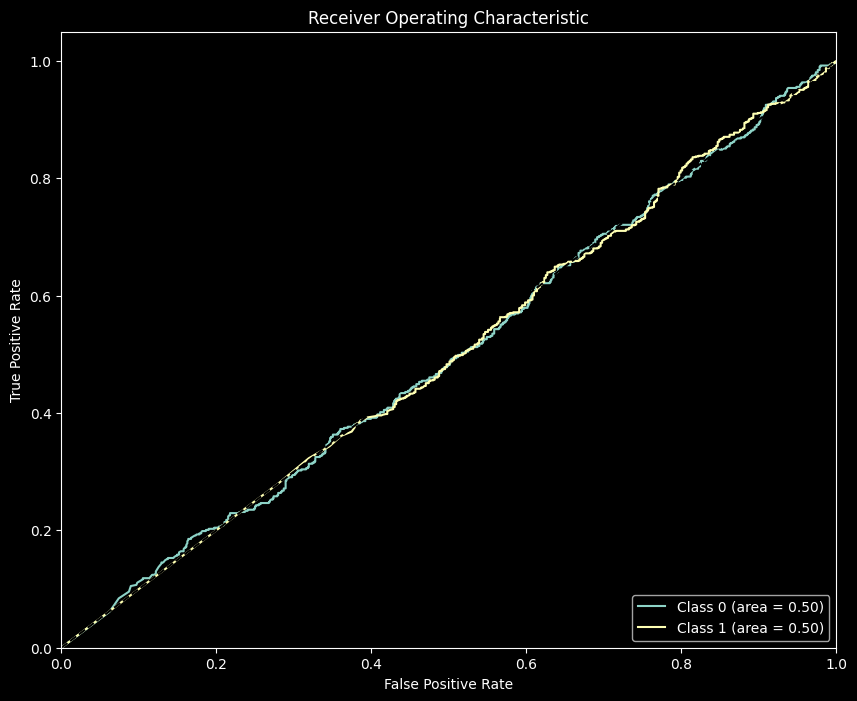

In [48]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
Y_pred = resnet_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [49]:
#DENSENET

In [50]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Define model parameters
input_shape = (224, 224, 3)
num_classes = 2

# Build DenseNet model
base_model = tf.keras.applications.DenseNet121(input_shape=input_shape, include_top=False, weights="imagenet")
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
densenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

# Compile model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10
densenet_history = densenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 27s 1us/step
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 805s 4s/step - accuracy: 0.7958 - loss: 0.6551 - val_accuracy: 0.8455 - val_loss: 0.5799
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.9674 - loss: 0.0877 - val_accuracy: 0.7918 - val_loss: 1.2067
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 737s 4s/step - accuracy: 0.9843 - loss: 0.0471 - val_accuracy: 0.6998 - val_loss: 1.7572
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.9891 - loss: 0.0341 - val_accuracy: 0.9845 - val_loss: 0.0696
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 743s 4s/step - accuracy: 0.9927 - loss: 0.0286 - val_accuracy: 0.7182 - val_loss: 2.0549
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 743s 4s/step - accuracy: 0.9846 - loss: 0.0478 - val_accuracy: 0.9735 - val_loss: 0.0736
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28004s 166s/step - accuracy: 0.9911 - loss: 0.0271 - val_accuracy: 0.9868 - val_loss: 0.0387
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 7

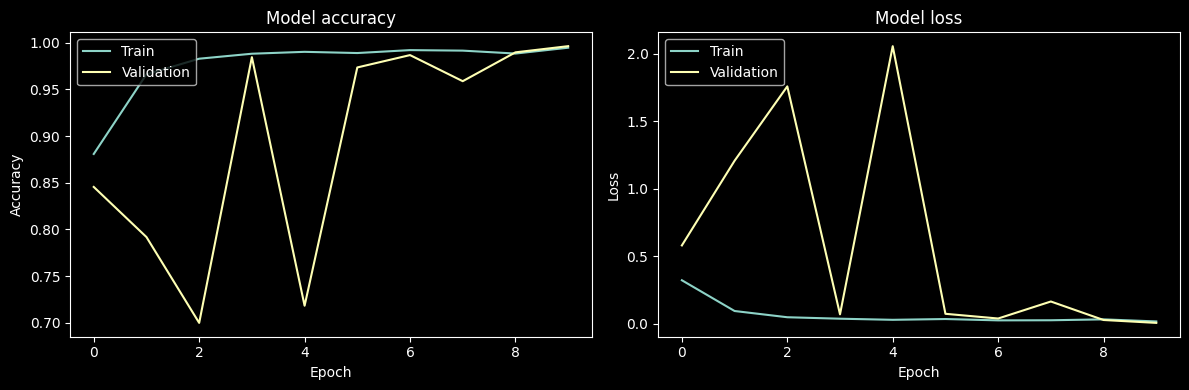

43/43 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step


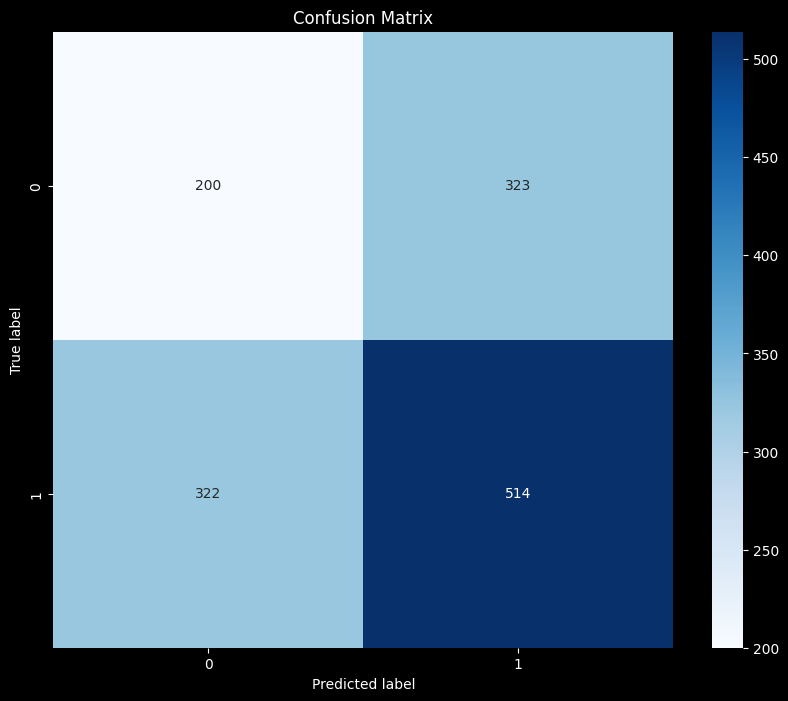

Classification Report
              precision    recall  f1-score   support

  Hemorrhage       0.38      0.38      0.38       523
      Normal       0.61      0.61      0.61       836

    accuracy                           0.53      1359
   macro avg       0.50      0.50      0.50      1359
weighted avg       0.53      0.53      0.53      1359



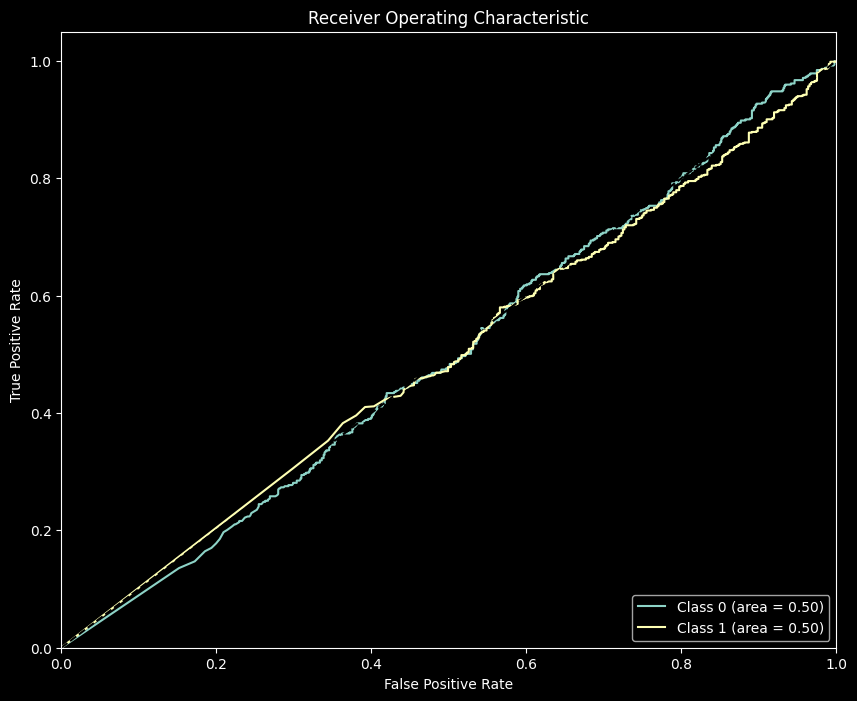

In [51]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['accuracy'])
plt.plot(densenet_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'])
plt.plot(densenet_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
Y_pred = densenet_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [56]:
#INCEPTIONV3

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - accuracy: 0.6628 - loss: 0.8289 - val_accuracy: 0.6821 - val_loss: 2.8435
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 431s 3s/step - accuracy: 0.9449 - loss: 0.1401 - val_accuracy: 0.9404 - val_loss: 0.2362
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.9774 - loss: 0.0763 - val_accuracy: 0.9639 - val_loss: 0.0881
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.9858 - loss: 0.0433 - val_accuracy: 0.9750 - val_loss: 0.0605
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.9848 - loss: 0.0450 - val_accuracy: 0.8962 - val_loss: 0.4058
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.9927 - loss: 0.0274 - val_accuracy: 0.9617 - val_loss: 0.2036
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.9943 - loss: 0.0206 - val_accuracy: 0.9073 - val_loss: 0.2819
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.9980 - loss: 0.0098 - val_accu

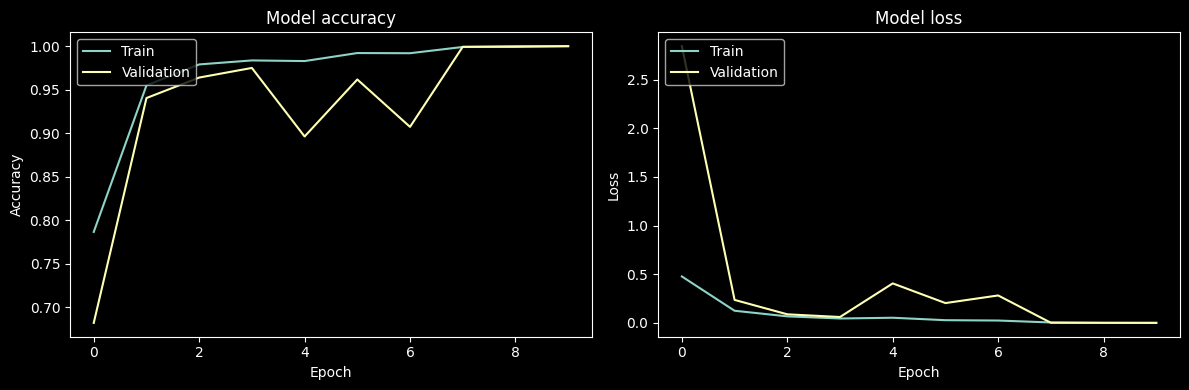

43/43 ━━━━━━━━━━━━━━━━━━━━ 33s 724ms/step


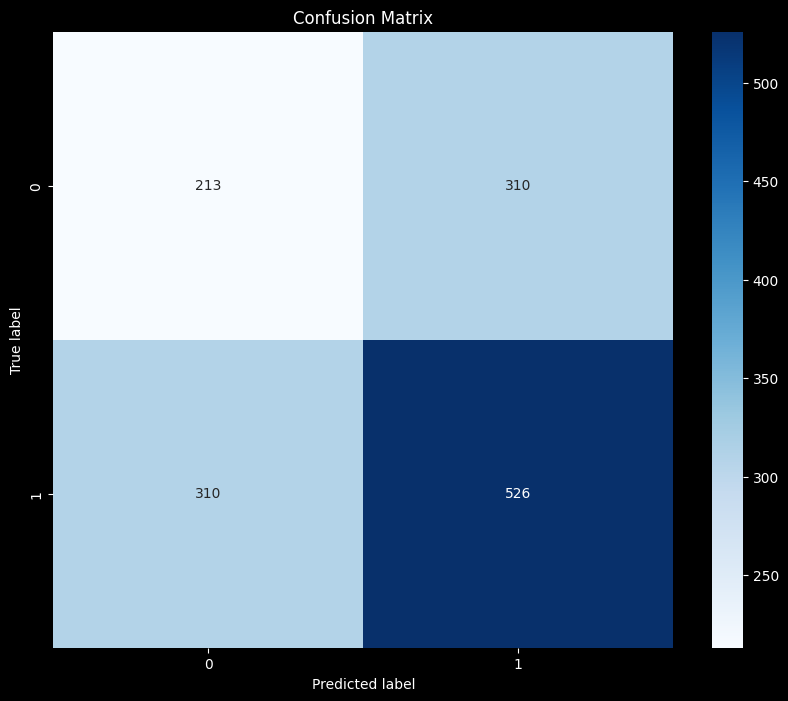

Classification Report
              precision    recall  f1-score   support

  Hemorrhage       0.41      0.41      0.41       523
      Normal       0.63      0.63      0.63       836

    accuracy                           0.54      1359
   macro avg       0.52      0.52      0.52      1359
weighted avg       0.54      0.54      0.54      1359



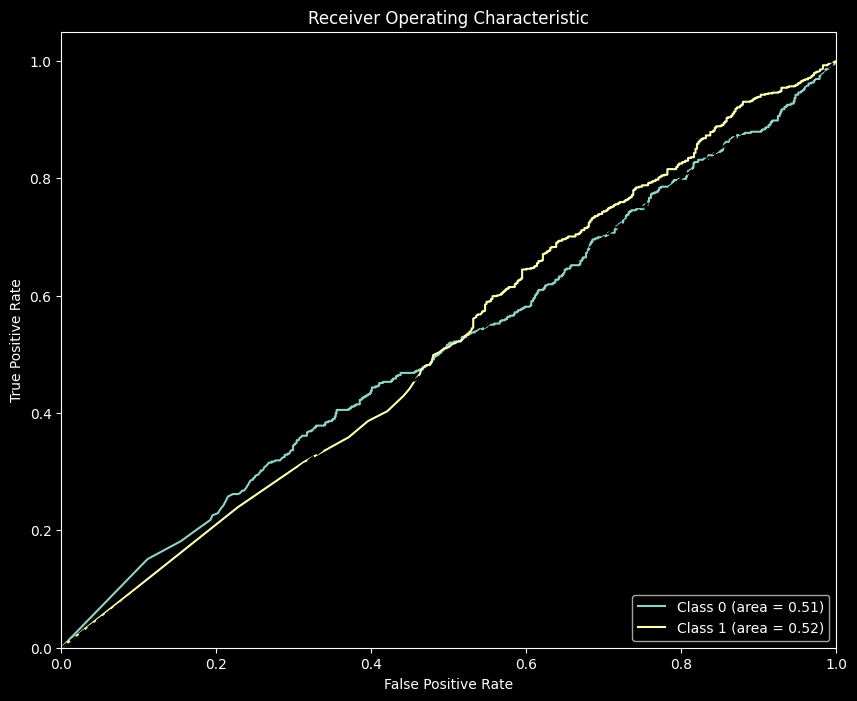

In [55]:
# Build InceptionV3 model
base_model = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights="imagenet")
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
inceptionv3_model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

# Compile model
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
inceptionv3_history = inceptionv3_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(inceptionv3_history.history['accuracy'])
plt.plot(inceptionv3_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(inceptionv3_history.history['loss'])
plt.plot(inceptionv3_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
Y_pred = inceptionv3_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 828ms/step - accuracy: 0.7602 - loss: 0.7089 - val_accuracy: 0.9985 - val_loss: 0.0137
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 79s 460ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9956 - val_loss: 0.0093
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 80s 463ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9963 - val_loss: 0.0062
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 77s 448ms/step - accuracy: 0.9999 - loss: 9.6151e-04 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 78s 455ms/step - accuracy: 1.0000 - loss: 5.8032e-05 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 77s 450ms/step - accuracy: 1.0000 - loss: 4.5604e-05 - val_accuracy: 0.9993 - val_loss: 8.1255e-04
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 79s 459ms/step - accuracy: 1.0000 - loss: 1.0343e-05 - val_accuracy: 0.9993 - val_loss: 8.3085e-04
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 78s 456ms/step - a

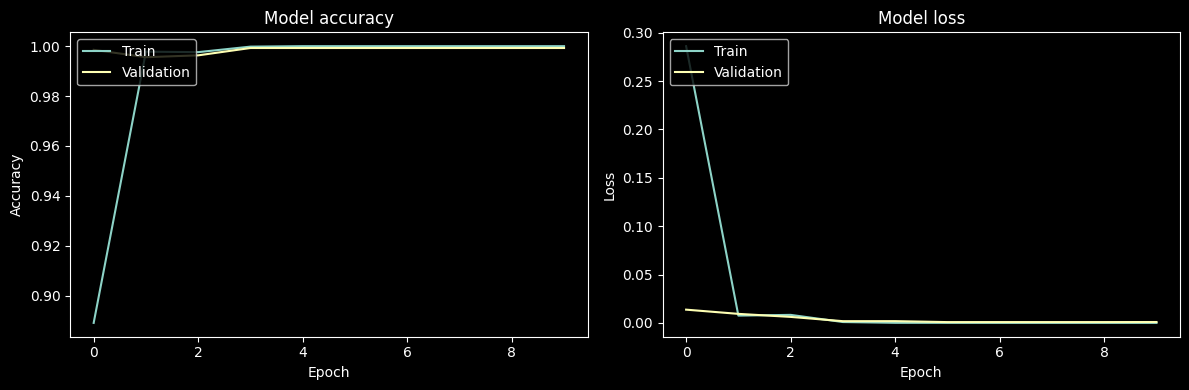

43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step


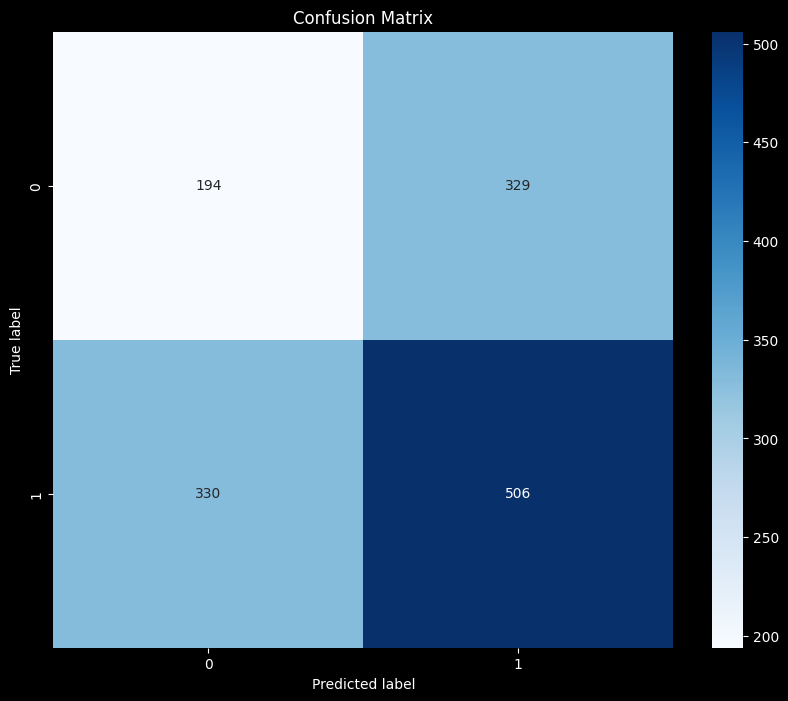

Classification Report
              precision    recall  f1-score   support

  Hemorrhage       0.37      0.37      0.37       523
      Normal       0.61      0.61      0.61       836

    accuracy                           0.52      1359
   macro avg       0.49      0.49      0.49      1359
weighted avg       0.52      0.52      0.52      1359



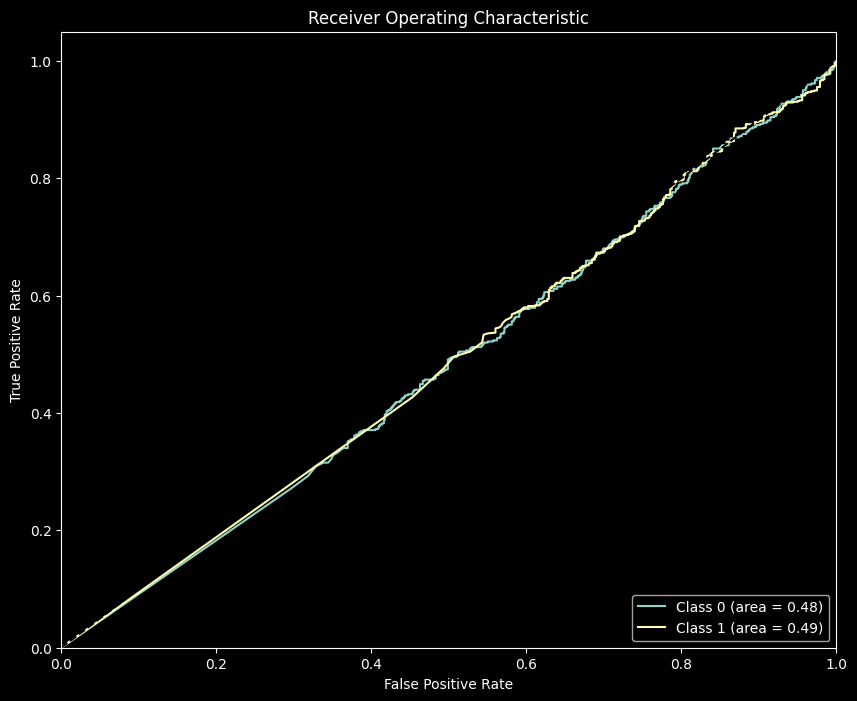

In [57]:
# Build custom CNN model
custom_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
custom_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
custom_cnn_history = custom_cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(custom_cnn_history.history['accuracy'])
plt.plot(custom_cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(custom_cnn_history.history['loss'])
plt.plot(custom_cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion Matrix
Y_pred = custom_cnn_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# ROC Curve and AUC
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()